In [1]:
#Name : Payal Kumari
#Section : DS
#Semester : 5th
#Subject : Big Data Storage and processing
#Project : Preprocessing and Data Visualization on Medical Fraud Detection

# Medical Fraud Detection

In [2]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#RANDOM_SEED = 42

#LABELS = ["Normal", "Fraud"]

# Preprocessing 
## Load test dataset

In [3]:
Test = pd.read_csv("Test-1542969243754.csv")
Test_Beneficiarydata = pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata = pd.read_csv("Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata = pd.read_csv("Test_Outpatientdata-1542969243754.csv")

In [4]:
#Lets Check Shape of datasets 
print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


# Test Data Understanding

In [5]:
## Lets check shape of Test Data
print('Test Shape:',Test.shape)
print('Test Sample:',Test.head(5))

Test Shape: (1353, 1)
Test Sample:    Provider
0  PRV51002
1  PRV51006
2  PRV51009
3  PRV51010
4  PRV51018


In [6]:
## Lets check whether  providers details are unique or not in test data
print(Test.Provider.value_counts(sort=True,ascending=False).head(10)) 
# number of unique providers in test data.Check for duplicates

print('\n Total missing values in Test :',Test.isna().sum().sum())

PRV57071    1
PRV53930    1
PRV57237    1
PRV56661    1
PRV57370    1
PRV56110    1
PRV55046    1
PRV54018    1
PRV51223    1
PRV56100    1
Name: Provider, dtype: int64

 Total missing values in Test : 0


# Beneficiary Data Understanding

In [7]:
#Lets Check missing values in each column in beneficiary data :
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [8]:
# Lets check data types of each column in beneficiary data
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [9]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1
Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [10]:
Test_Beneficiarydata.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,0,1,0,1,1,0,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,0,1,1,1,0,0,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,0,0,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,1,45,780,12,12,...,1,0,1,0,0,0,21260,2136,120,100
5,BENE11016,1919-09-01,NaN,2,2,0,34,400,12,12,...,0,1,1,1,0,1,0,0,2320,1480
6,BENE11017,1940-06-01,NaN,2,1,0,31,270,12,12,...,0,1,1,0,1,1,22000,2136,1400,840
7,BENE11019,1924-05-01,NaN,1,3,0,7,50,12,12,...,1,1,1,1,0,0,0,0,780,290
8,BENE11021,1927-12-01,NaN,1,3,0,7,20,12,12,...,1,1,1,1,1,0,0,0,520,150
9,BENE11026,1938-04-01,NaN,1,1,0,22,20,12,12,...,0,0,1,0,0,0,2000,1068,0,0


## Add Age of Person based on his/her DOD(Date of death ) and DOB (Date of Birth)


In [11]:
## Lets Create Age column to the dataset

Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

In [12]:
## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)

In [13]:
Test_Beneficiarydata.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0
2,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,...,1,1,1,0,0,0,0,1170,660,73.0
3,BENE11011,1914-03-01,NaT,2,2,0,1,360,12,12,...,1,0,0,1,1,5000,1068,250,320,96.0
4,BENE11014,1938-04-01,NaT,2,1,1,45,780,12,12,...,0,1,0,0,0,21260,2136,120,100,72.0
5,BENE11016,1919-09-01,NaT,2,2,0,34,400,12,12,...,1,1,1,0,1,0,0,2320,1480,90.0
6,BENE11017,1940-06-01,NaT,2,1,0,31,270,12,12,...,1,1,0,1,1,22000,2136,1400,840,70.0
7,BENE11019,1924-05-01,NaT,1,3,0,7,50,12,12,...,1,1,1,0,0,0,0,780,290,86.0
8,BENE11021,1927-12-01,NaT,1,3,0,7,20,12,12,...,1,1,1,1,0,0,0,520,150,82.0
9,BENE11026,1938-04-01,NaT,1,1,0,22,20,12,12,...,0,1,0,0,0,2000,1068,0,0,72.0


# Inpatient data understanding

In [14]:
#Lets check missing values in each column in inpatient data
Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [15]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 
Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

In [16]:
## Lets check Min and Max values of AdmitforDays column in Test.
print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())

#Check Null values.
Test_Inpatientdata.AdmitForDays.isnull().sum()   

Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

# Outpatient Data understanding

In [17]:
#Lets Check null values in each columnn of outpatient data
Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [18]:
## Lets Check Shape of datasets after adding new variables
print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 26)
Shape of Test_Inpatientdata data : (9551, 31)
Shape of Test_Outpatientdata data : (125841, 27)


# Data Merging
As we see columns in inpatient and outpatient data are similar, we will merge this data based on these similar keys using outer join.

In [19]:
Test_Inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'AdmitForDays'],
      dtype='object')

In [20]:
Test_Outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

## Merge Inpatient and Outpatinet data and create dataset for all patients.

In [21]:
Test_Allpatientdata=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [22]:
Test_Allpatientdata.shape

(135392, 31)

In [23]:
Test_Allpatientdata.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,0.0,5939,NaT,NaT,NaN,NaN
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
5,BENE11007,CLM537365,2009-08-21,2009-08-21,PRV56612,600,PHY433586,NaN,PHY334391,8409,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
6,BENE11007,CLM646966,2009-10-24,2009-10-24,PRV56678,50,PHY396806,NaN,PHY404886,4011,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
7,BENE11007,CLM689394,2009-11-19,2009-11-19,PRV56565,50,PHY386663,NaN,PHY431113,4019,...,NaN,NaN,NaN,NaN,0.0,4019,NaT,NaT,NaN,NaN
8,BENE11010,CLM140012,2009-01-16,2009-01-16,PRV56204,20,PHY371583,NaN,PHY371583,4111,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
9,BENE11010,CLM165765,2009-01-30,2009-01-30,PRV56204,70,PHY314960,NaN,NaN,V777,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN


## Merge Beneficiary details to All Patients data

In [24]:
Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [25]:
print('Shape of All Patient Details Test : ',Test_AllPatientDetailsdata.shape)
Test_AllPatientDetailsdata.head(10)

Shape of All Patient Details Test :  (135392, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,1,1,0,1,1,36000,3204,60,70,67.0
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,1,0,1,1,0,0,0,1490,160,69.0
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,1,0,1,1,0,0,0,1490,160,69.0
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,1,0,1,1,0,0,0,1490,160,69.0
5,BENE11007,CLM537365,2009-08-21,2009-08-21,PRV56612,600,PHY433586,NaN,PHY334391,8409,...,1,0,1,1,0,0,0,1490,160,69.0
6,BENE11007,CLM646966,2009-10-24,2009-10-24,PRV56678,50,PHY396806,NaN,PHY404886,4011,...,1,0,1,1,0,0,0,1490,160,69.0
7,BENE11007,CLM689394,2009-11-19,2009-11-19,PRV56565,50,PHY386663,NaN,PHY431113,4019,...,1,0,1,1,0,0,0,1490,160,69.0
8,BENE11010,CLM140012,2009-01-16,2009-01-16,PRV56204,20,PHY371583,NaN,PHY371583,4111,...,1,1,1,0,0,0,0,1170,660,73.0
9,BENE11010,CLM165765,2009-01-30,2009-01-30,PRV56204,70,PHY314960,NaN,NaN,V777,...,1,1,1,0,0,0,0,1170,660,73.0


## Merge provider to create ProviderWithPatientDetails data

In [26]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join
Test_ProviderWithPatientDetailsdata = pd.merge(Test,Test_AllPatientDetailsdata,on='Provider')

In [27]:
## Lets Print the shape of dataset 
print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.head(10)

Shape of Test Provider with Patient Details data :- (135392, 56)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,514,...,1,0,0,0,0,0,0,1310,590,75.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,7840,...,1,1,0,0,0,22000,3204,1020,910,89.0
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70,PHY352340,NaN,NaN,V4581,...,1,1,0,0,0,22000,3204,1020,910,89.0
3,PRV51002,BENE13915,CLM500906,2009-08-01,2009-08-01,100,PHY366184,NaN,NaN,42789,...,1,1,0,0,0,22000,3204,1020,910,89.0
4,PRV51002,BENE14575,CLM272820,2009-03-29,2009-03-29,400,PHY401762,NaN,PHY330212,1532,...,1,1,1,0,1,8000,13136,1520,730,49.0
5,PRV51002,BENE14589,CLM527658,2009-08-16,2009-08-16,60,PHY345886,NaN,PHY418464,7202,...,1,1,1,1,0,0,0,1750,2300,40.0
6,PRV51002,BENE15037,CLM669117,2009-11-07,2009-11-07,10,PHY397128,NaN,NaN,2862,...,0,1,1,0,0,0,0,1650,50,82.0
7,PRV51002,BENE15945,CLM722907,2009-12-10,2009-12-10,30,PHY364190,NaN,PHY410547,V1046,...,0,0,0,0,0,0,0,80,50,58.0
8,PRV51002,BENE16399,CLM614330,2009-10-05,2009-10-05,50,PHY351108,NaN,NaN,V6809,...,0,1,1,0,0,0,0,120,40,51.0
9,PRV51002,BENE17361,CLM424246,2009-06-19,2009-06-19,70,PHY410547,NaN,NaN,8795,...,1,1,1,0,0,0,0,1690,190,70.0


In [28]:
### Lets check missing value percentage in full datasets
print('Percent missing values in Test Provider with patient details data :\n')
Test_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Test_ProviderWithPatientDetailsdata)

Percent missing values in Test Provider with patient details data :



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

# Data Visualization

# race-wise beneficiaries

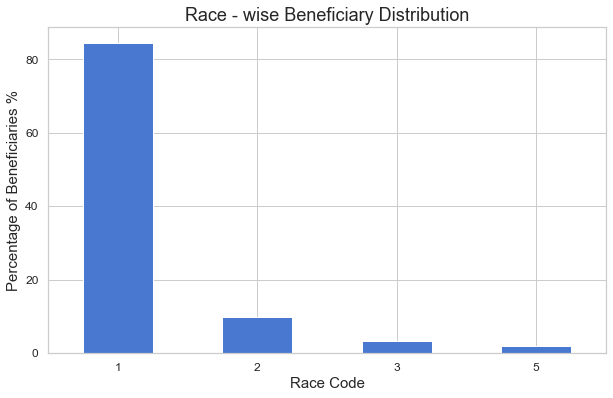

<Figure size 432x288 with 0 Axes>

In [29]:
#PLotting the frequencies of race-wise beneficiaries
count_Race = pd.value_counts(Test_Beneficiarydata['Race'], sort = True)

#Drawing a barplot
(count_Race*100/len(Test_Beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.yticks(np.arange(0,100,20))
plt.title("Race - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)

plt.show()

plt.savefig('RacewiseBeneficiaryDistribution')

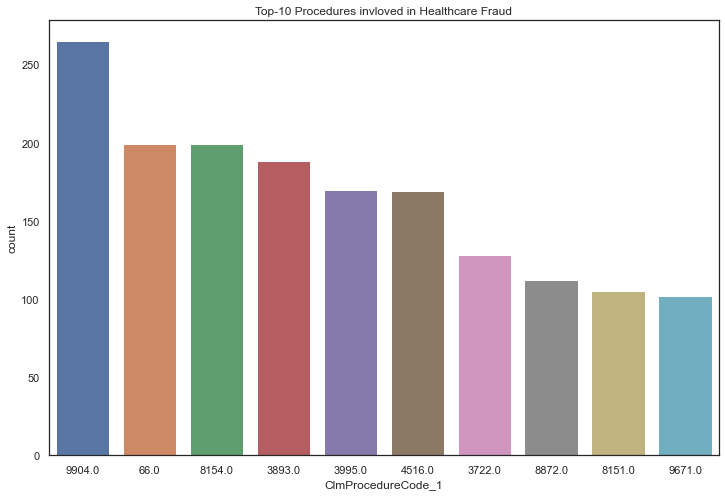

<Figure size 864x576 with 0 Axes>

In [30]:
## lets plot Top-10 Claim Procedures invloved in Healthcare Fraud

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',data=Test_ProviderWithPatientDetailsdata
              ,order=Test_ProviderWithPatientDetailsdata.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')


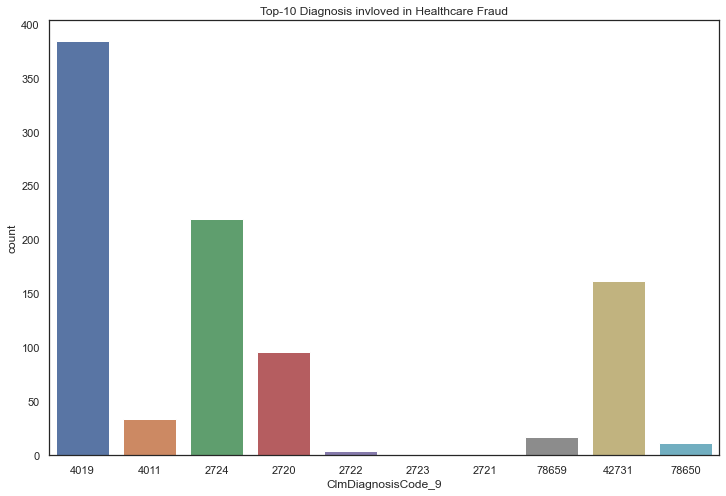

<Figure size 864x576 with 0 Axes>

In [31]:
## lets plot Top-10 Claim Diagnosis  invloved in Healthcare Fraud

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmDiagnosisCode_9',data=Test_ProviderWithPatientDetailsdata
              ,order=Test_ProviderWithPatientDetailsdata.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.show()

plt.savefig('TopDiagnosisInnvlovedinHealthcareFraud')

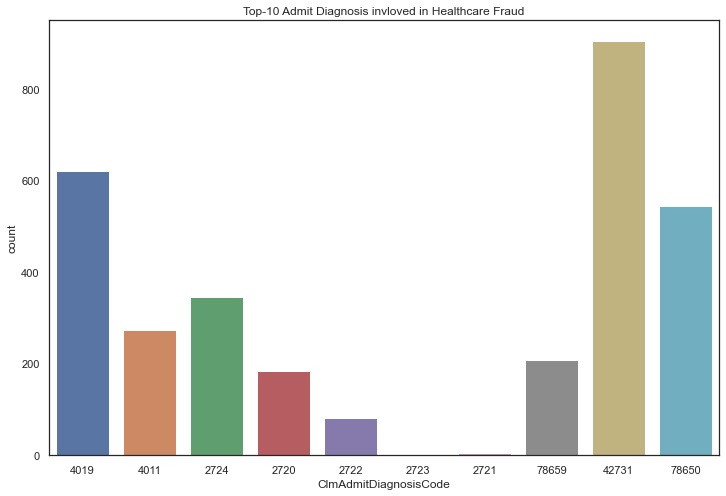

<Figure size 864x576 with 0 Axes>

In [32]:
## lets plot Top-10 Claim Diagnosis  invloved in Healthcare Fraud

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmAdmitDiagnosisCode',data=Test_ProviderWithPatientDetailsdata
              ,order=Test_ProviderWithPatientDetailsdata.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Admit Diagnosis invloved in Healthcare Fraud')
plt.show()

plt.savefig('TopAdmitDiagnosisInnvlovedinHealthcareFraud')

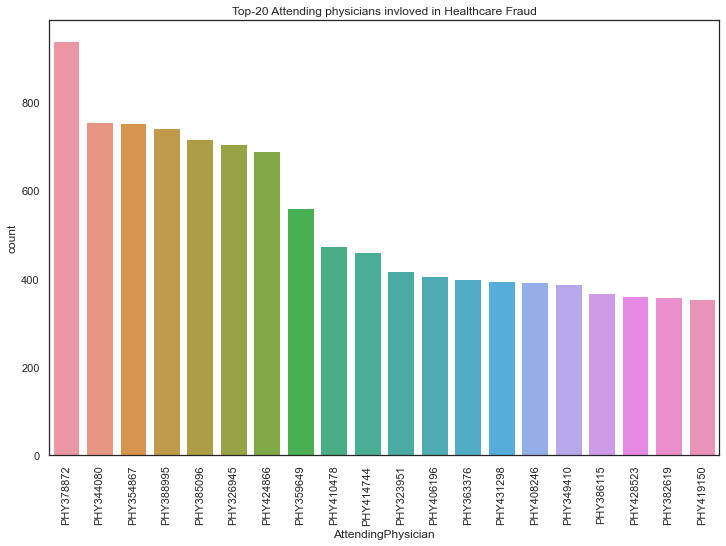

<Figure size 864x576 with 0 Axes>

In [33]:
### lets plot Top-20 Attending Physicians invloved in Healthcare Fraud 

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax= sns.countplot(x='AttendingPhysician',data=Test_ProviderWithPatientDetailsdata
              ,order=Test_ProviderWithPatientDetailsdata.AttendingPhysician.value_counts().iloc[:20].index)

    
plt.title('Top-20 Attending physicians invloved in Healthcare Fraud')
plt.xticks(rotation=90)
plt.show()

plt.savefig('TopAttendingphysiciansinvlovedinHealthcareFraud')

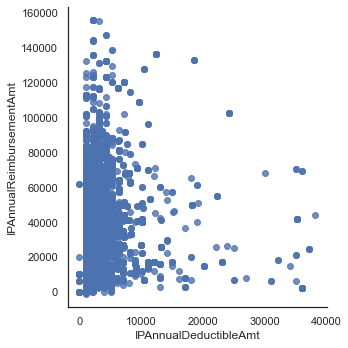

In [34]:
## Lets Plot IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',fit_reg=False,data=Test_ProviderWithPatientDetailsdata)


#plt.title('IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories')

plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')

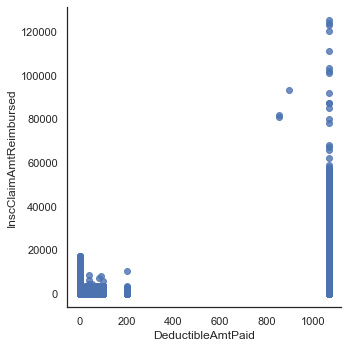

In [35]:
## Lets Plot DeductibleAmtPaid and InsClaimAmtReimbursed in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',fit_reg=False,data=Test_ProviderWithPatientDetailsdata)


plt.savefig('DeductibleAmtPaidandInsClaimAmtReimbursed')

# Thank you